# Lagrange Multipliers


In this lab we will explore properties of Lagrange Multipliers, with a focus on the need for contours of the objective function $f$ to be tangent to the contours of the constraint function $g$.

We will lead with an example:


## Example


Consider the objective function $f(x, y) = x^2 + y^2$ and the constraint $g(x,y)=0$ where $g(x,y) = y-x^2 + 1$.

To apply the method of Lagrange Multipliers to this, we find

\begin{align*}
\nabla f &= 2x \vec{i} + 2y\vec{j}\\
\nabla g &= -2x \vec{i} + \vec{j}
\end{align*}
Then $\nabla f = \lambda \nabla g$ yields
\begin{align*}
2x &= - 2\lambda x\\
2y &= \lambda
\end{align*}

From the first equation we conclude that $\lambda = -1$ or $x=0$.  

- Assuming $x=0$ and using the constraint $g(x,y)=0$ yields $y=-1$.  So we have a stationary point at $(0,-1)$.
- Assuming that $\lambda = -1$ the second equation yields $y=-1/2$.  Substituting this into the constraint gives $x = \pm 1/\sqrt{2}$.  So we have stationary points at $(1/\sqrt{2},-1/2)$ and $(-1/\sqrt{2},-1/2)$.

For these points we can find $f$:

\begin{align*}
        f(0,-1) &= 1\\
        f(1/\sqrt{2},-1/2) &= 1/2 + 1/4 = 3/4\\
        f(-1/\sqrt{2},-1/2) &= 3/4
\end{align*}

For reference, we plot the constraint curve and a few contours of $f$ including those corresponding to $1$ and $3/4$.



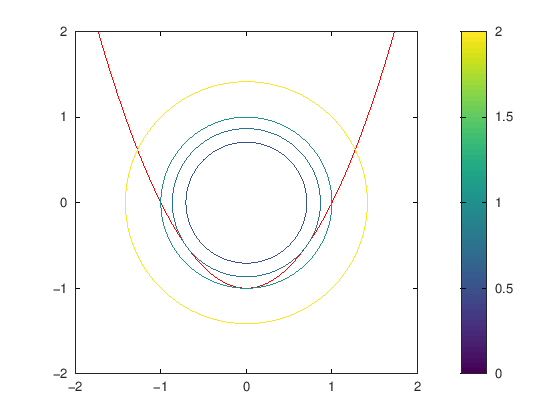

In [3]:
x = [-2:0.05:2];
y = [-2:0.05:2];

[X,Y] = meshgrid(x,y);

G = Y - X.^2 + 1;
F = X.^2 + Y.^2;

contour(X,Y,G, [0,0], 'r')
hold on 
contour(X,Y,F, [1/2, 3/4, 1, 2])

daspect([1,1])
colorbar

We see in the figure that as $x^2+y^2$ is increased, it first becomes tangent to the constraint parabola in two points.  These are the minima of $3/4$.  As $x^2+y^2$ increases further, a new point of tangency emerges, and that is the lowest point in the parabola.  As we increase further, there is no value that makes the functions tangent.  

We can also see that there are points on the constraint which are arbitarily far from the origin.  As we do this, the value of $f$ increases.  

## example

consider the gutter cross section that appeared in the videos for lesson 4B on stationary points:
![gutter schematic](gutter.png "gutter")

the three variables of interest are $h$ $b$, and the angle $\alpha$.  We want to maximixe the cross section area which equals $A(h,b,\alpha)=hb + h^2\tan(\alpha)/2$ subject to the constraint $g(h,b,\alpha)=h+b+h\sec(\alpha)-1=0$.  in 4B, we used the constraint to eliminate one variable and then found the maximum of the remaining $2$-dimensional system.  Here we will use all three variables and Lagrange multipliers.  We will treat the variables as Cartesian coordinates and find the maximum of $A$ subject to the constraint $g(h,b,\alpha)=0$.

\begin{align*}
\nabla A &= (b + 2 h \tan(\alpha)/2)\vec{i} + h \vec{j} + h^2 \sec^2(\alpha)/2 \vec{k}\\
\nabla g &= (1 + \sec(\alpha))\vec{i} + \vec{j} + h \sec(\alpha)\tan(\alpha)
\end{align*}
So

\begin{align*}
(b + 2 h \tan(\alpha)/2) &= \lambda  (1 + \sec(\alpha))\\
h &= \lambda\\
h^2 \sec^2(\alpha)/2 &= \lambda h \sec(\alpha)\tan(\alpha)\\
h+b+h\sec(\alpha)-1&=0
\end{align*}
are the equations.

We see $h= \lambda$ so they become

\begin{align*}
(b + h \tan(\alpha)) &= h  (1 + \sec(\alpha))\\
h^2 \sec^2(\alpha)/2 &= h^2 \sec(\alpha)\tan(\alpha)\\
h+b+h\sec(\alpha)-1&=0
\end{align*}
The second of these equations becomes

$$
\frac{\sec^2(\alpha)}{2} = \sec{\alpha}\tan{\alpha}
$$
This leads to the conclusion that $\tan(\alpha) = \sec(\alpha)/2$.  

In the notes for Lesson 4B, we showed that this condition implies $\alpha = \pi/6$ (a $30^\circ$ angle).   This can be derived by constructing a right triangle with one side of length $1$ and hypotenuse of length $\sec(\alpha)$.  The opposite side has length $\tan(\alpha) = \sec{(\alpha)}/2$.  Using the Pythagorean Theorem, this leads to $\sec(\alpha) = 2/\sqrt{3}$ and $\tan(\alpha) = 1/\sqrt{3}$. 

The first equation above $(b + 2 h \tan(\alpha)/2) = h  (1 + \sec(\alpha))$ becomes $b + h/\sqrt{3} = h(1+2/\sqrt{3})$.  The constraint becomes $b + h(1+2/\sqrt{3})-1 = 0$.  We can solve this to get $h = 1/(2+\sqrt{3})$ and 

\begin{align*}
b &= 1 - h - h \sec(\alpha) \\
&= 1 - h(1+\sec(\alpha))\\
& = 1 - \frac{1}{2+\sqrt{3}}\frac{2+\sqrt{3}}{\sqrt{3}}\\
&=  1 - \frac{1}{\sqrt{3}}
\end{align*}

## Self-test

First, look at the figure and think about what you would intuitively expect is the angle that maximizes the cross section.

In the code below, use different values of $\alpha$ and track the maximum value of $A$ on the line corresponding to the constraint.  Ideally, plot the area as a function of $\alpha$.

In [0]:
alpha = pi/4;

h = [0:0.05:1];
b = [0:0.05:1];
[H,B] = meshgrid(h,b);

%constraint is b = 1- h - h sec(alpha)
% Area = hb + h^2\tan(\alpha)/2
A = H.*B + H.^2*tan(alpha)/2;
contour(H,B, A)
colorbar
hold on
plot(h, 1-h-h*sec(alpha), 'r')
xlabel('h')
ylabel('b')